In [16]:
import matplotlib.pyplot as plt

In [18]:
import numpy as np

In [1]:
import pandas as pd

In [ ]:
"""
n	DGEMM	Bini
512	1	.9
1024	8	7.9
2048	64	63.9
4096	512	510
8192	4096	4000
"""

In [2]:
df = pd.read_csv("oneThreadTime.csv")

In [3]:
df.head()

,Algorithm,Matrix_Size,Layer_2_matmul_time,Total_fastmm_time,Total_time
0,dgemm,512,5204562.0,56020914.0,102602406.6
1,bini322,512,6254049.0,65692988.0,111722768.7
2,schonhage333,512,6552512.0,68468198.0,114879526.8
3,smirnov224,512,5707803.0,61161703.0,106553489.5
4,smirnov225,512,6086669.0,65499683.0,110828566.8


In [12]:
times = []
for size in [512, 1024, 2048, 4096, 8192]:
    row = {'n': size}
    for algo in ['bini322', 'dgemm', 'schonhage333', 'smirnov224', 'smirnov225', 'smirnov272', 'smirnov323', 'smirnov333', 'smirnov334', 'smirnov442', 'smirnov444', 'smirnov552', 'smirnov555']:
        row[algo] = df[df['Matrix_Size'] == size][df['Algorithm'] == algo]['Total_time'].iloc[0]
    times.append(row)

/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jackweissenberger/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarn

In [13]:
output = pd.DataFrame(times)

In [15]:
output

,n,bini322,dgemm,schonhage333,smirnov224,smirnov225,smirnov272,smirnov323,smirnov333,smirnov334,smirnov442,smirnov444,smirnov552,smirnov555
0,512,1.117228e+08,1.026024e+08,1.148795e+08,1.065535e+08,1.108286e+08,1.233050e+08,1.121905e+08,117007122.5,115663285.0,107402000.0,110152837.3,124371581.6,137145446.6
1,1024,3.253418e+08,3.197882e+08,3.276066e+08,3.138039e+08,3.196222e+08,3.438069e+08,3.226876e+08,326072212.7,323887511.6,302654372.0,306785166.9,350370422.1,368539347.6
2,2048,1.068520e+09,1.104671e+09,1.060380e+09,1.004126e+09,1.015068e+09,1.042686e+09,1.056635e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,4096,3.529142e+09,3.894756e+09,3.470829e+09,3.567044e+09,3.435778e+09,3.937316e+09,3.416982e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,8192,1.326735e+10,1.460738e+10,1.273772e+10,1.272414e+10,1.263674e+10,1.309027e+10,1.255119e+10,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
output.to_csv('one_thread_NN_times.dat', index=False, sep='\t')

In [ ]:
{'n': 512, 'bini': 123455}

In [2]:
NN_acc = pd.DataFrame()
NN_acc['epoch'] = list(range(50))
for algo in ['bini322', 'dgemm', 'schonhage333', 'smirnov224', 'smirnov225', 'smirnov272', 'smirnov323', 'smirnov333', 'smirnov334', 'smirnov442', 'smirnov444', 'smirnov552', 'smirnov555']:
    f = open(f"ACCURACY_TEST_{algo}_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
    file = f.read()
    f.close()
    train_accuracy = file.split('\n')[0].split(',')[1:]
    for i in range(len(train_accuaracy)):
        train_accuracy[i] = float(train_accuracy[i])

    test_accuracy = file.split('\n')[2].split(',')[1:]
    for i in range(len(test_accuracy)):
        test_accuracy[i] = float(test_accuracy[i])
    
    NN_acc[f'{algo}_train'] = train_accuracy
    NN_acc[f'{algo}_test'] = test_accuracy

In [3]:
NN_acc.head()

,epoch,bini322_train,bini322_test,dgemm_train,dgemm_test,schonhage333_train,schonhage333_test,smirnov224_train,smirnov224_test,smirnov225_train,...,smirnov334_train,smirnov334_test,smirnov442_train,smirnov442_test,smirnov444_train,smirnov444_test,smirnov552_train,smirnov552_test,smirnov555_train,smirnov555_test
0,0,0.897783,0.9495,0.897700,0.9494,0.897683,0.9503,0.897717,0.9487,0.897467,...,0.897750,0.9500,0.897517,0.9496,0.897183,0.9490,0.897967,0.9507,0.897433,0.9491
1,1,0.962450,0.9665,0.962117,0.9663,0.962250,0.9665,0.962750,0.9658,0.961933,...,0.962400,0.9661,0.962067,0.9667,0.962000,0.9660,0.962683,0.9662,0.962050,0.9673
2,2,0.975967,0.9704,0.975933,0.9705,0.975717,0.9710,0.976150,0.9711,0.975817,...,0.976067,0.9717,0.976067,0.9704,0.975467,0.9702,0.975917,0.9714,0.975967,0.9703
3,3,0.983217,0.9714,0.983000,0.9721,0.982633,0.9720,0.983183,0.9706,0.982717,...,0.983133,0.9696,0.982717,0.9727,0.982783,0.9704,0.982783,0.9717,0.983050,0.9683
4,4,0.986133,0.9725,0.985550,0.9735,0.986533,0.9686,0.986050,0.9744,0.986600,...,0.986050,0.9740,0.986067,0.9715,0.986617,0.9713,0.986200,0.9716,0.985767,0.9754


In [5]:
NN_acc.to_csv('NN_acc.dat', index=False, sep='\t')

# Dgemm

In [12]:
f = open("ACCURACY_TEST_dgemm_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()

In [29]:
dgemm_train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    dgemm_train_accuracy[i] = float(dgemm_train_accuracy[i])

dgemm_test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(dgemm_test_accuracy)):
    dgemm_test_accuracy[i] = float(dgemm_test_accuracy[i])

Text(0, 0.5, 'Accuracy')

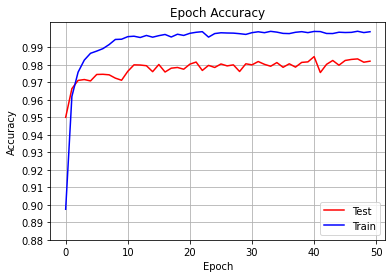

In [30]:
plt.plot(range(50), dgemm_test_accuracy, 'r')
plt.plot(range(50), dgemm_train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Bini

In [31]:
f = open("ACCURACY_TEST_bini322_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

Text(0, 0.5, 'Accuracy')

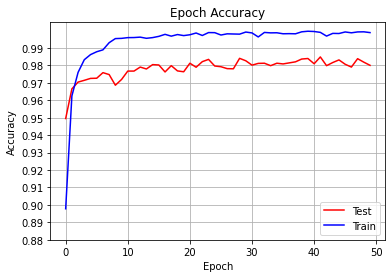

In [32]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

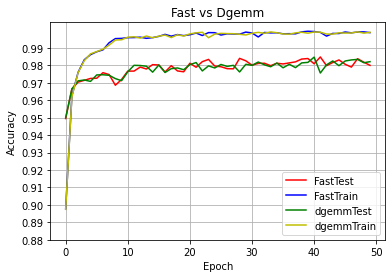

In [34]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Schonhage333

Text(0, 0.5, 'Accuracy')

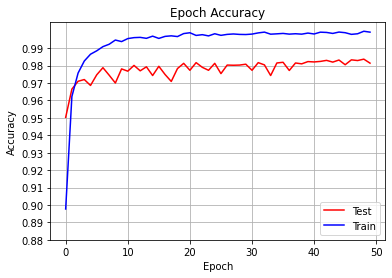

In [35]:
f = open("ACCURACY_TEST_schonhage333_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

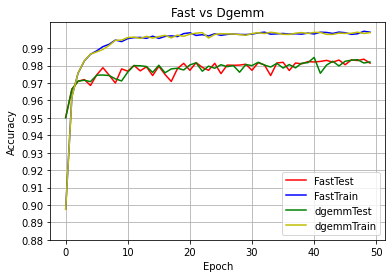

In [36]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 224

Text(0, 0.5, 'Accuracy')

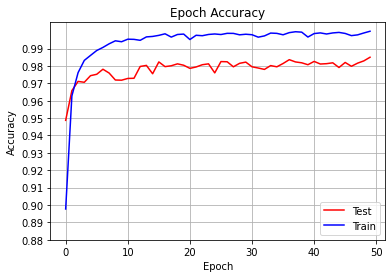

In [37]:
f = open("ACCURACY_TEST_smirnov224_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

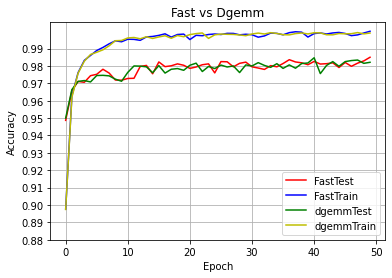

In [38]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 225

Text(0, 0.5, 'Accuracy')

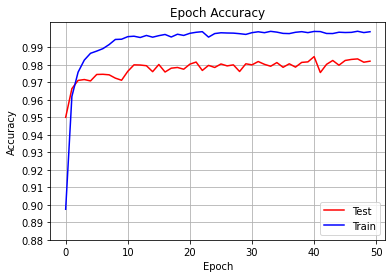

In [41]:
f = open("ACCURACY_TEST_smirnov225_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

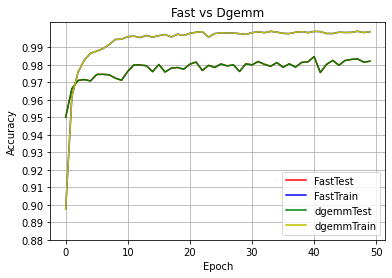

In [42]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 272

Text(0, 0.5, 'Accuracy')

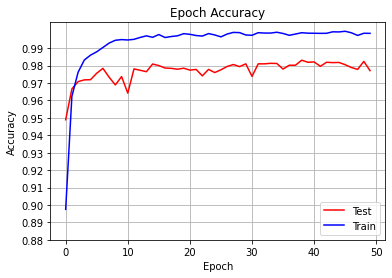

In [43]:
f = open("ACCURACY_TEST_smirnov272_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

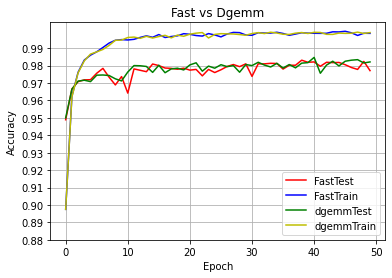

In [44]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 323

Text(0, 0.5, 'Accuracy')

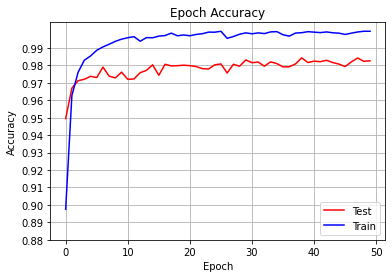

In [45]:
f = open("ACCURACY_TEST_smirnov323_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

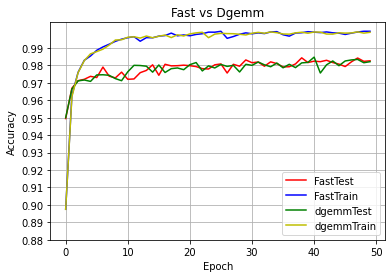

In [46]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 333

Text(0, 0.5, 'Accuracy')

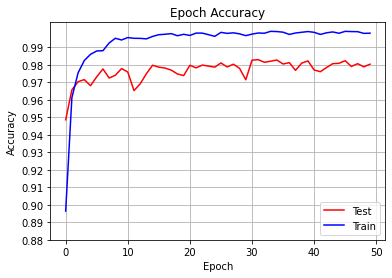

In [47]:
f = open("ACCURACY_TEST_smirnov333_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

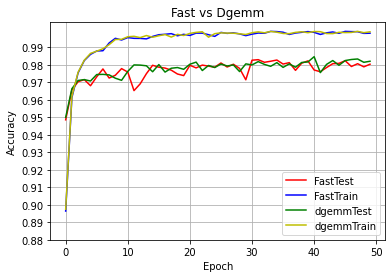

In [48]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 334

Text(0, 0.5, 'Accuracy')

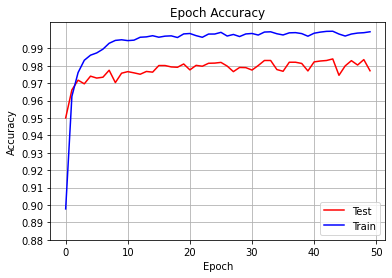

In [49]:
f = open("ACCURACY_TEST_smirnov334_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

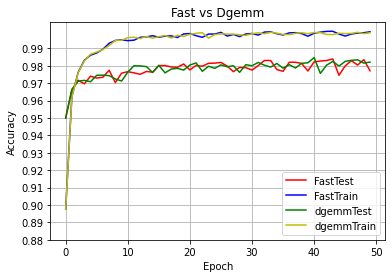

In [50]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 442

Text(0, 0.5, 'Accuracy')

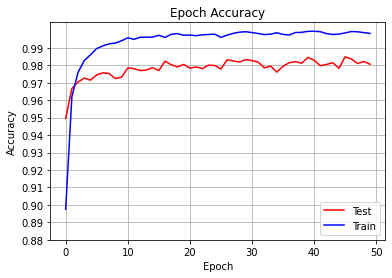

In [51]:
f = open("ACCURACY_TEST_smirnov442_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

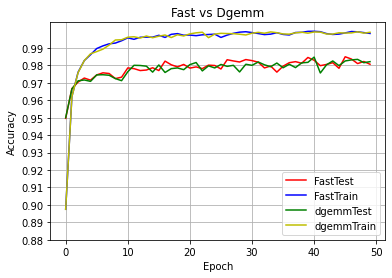

In [52]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 444

Text(0, 0.5, 'Accuracy')

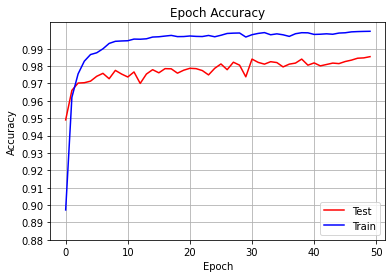

In [53]:
f = open("ACCURACY_TEST_smirnov444_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

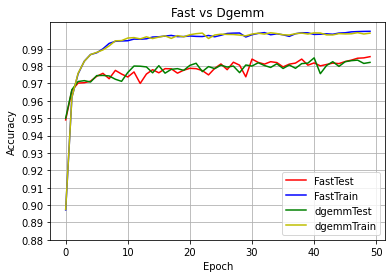

In [54]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 552

Text(0, 0.5, 'Accuracy')

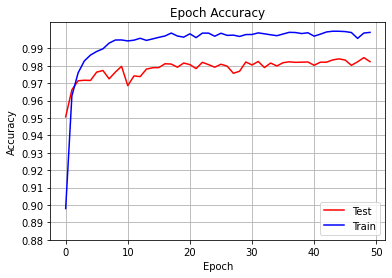

In [55]:
f = open("ACCURACY_TEST_smirnov552_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

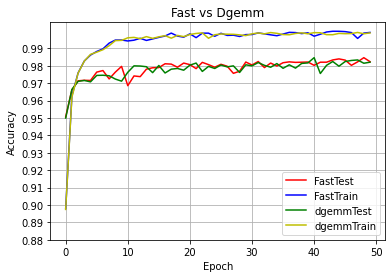

In [56]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])

# Smirnov 555

Text(0, 0.5, 'Accuracy')

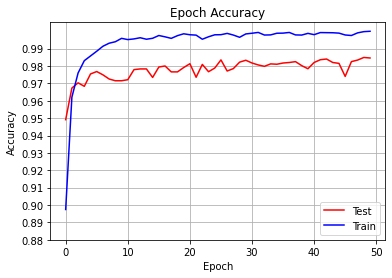

In [57]:
f = open("ACCURACY_TEST_smirnov555_layers2_nodes300_epochs50_bs300_accuracy_and_loss.txt", "r")
file = f.read()
f.close()
train_accuracy = file.split('\n')[0].split(',')[1:]
for i in range(len(train_accuracy)):
    train_accuracy[i] = float(train_accuracy[i])

test_accuracy = file.split('\n')[2].split(',')[1:]
for i in range(len(test_accuracy)):
    test_accuracy[i] = float(test_accuracy[i])

plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.legend(['Test', 'Train'])
plt.title("Epoch Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

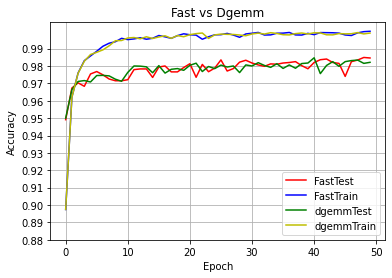

In [58]:
plt.plot(range(50), test_accuracy, 'r')
plt.plot(range(50), train_accuracy, 'b')
plt.plot(range(50), dgemm_test_accuracy, 'g')
plt.plot(range(50), dgemm_train_accuracy, 'y')
plt.yticks(np.arange(0.88, 1.0, 0.01))
plt.grid(b=True)
plt.title("Fast vs Dgemm")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['FastTest', 'FastTrain', 'dgemmTest', 'dgemmTrain'])